Test 1

lemmatized: No, no_stopword: No
0.8532608695652174

lemmatized: Yes, no_stopword: No
0.8695652173913043

lemmatized: No, no_stopword: Yes
0.8695652173913043

lemmatized: Yes, no_stopword: Yes
0.8967391304347826

Test 2

Threshold : 0.1
Precision : 0.5897435897435898 
Recall : 1.0 

Threshold : 0.2
Precision : 0.609271523178808 
Recall : 1.0 

Threshold : 0.3
Precision : 0.6371681415929203 
Recall : 0.9782608695652174 

Threshold : 0.4
Precision : 0.6395348837209303 
Recall : 0.8967391304347826 

Threshold : 0.5
Precision : 0.6088888888888889 
Recall : 0.7445652173913043 

Threshold : 0.6
Precision : 0.5492227979274611 
Recall : 0.5760869565217391 

Threshold : 0.7
Precision : 0.5287356321839081 
Recall : 0.5 

Threshold : 0.8
Precision : 0.4098939929328622 
Recall : 0.31521739130434784 

Threshold : 0.9
Precision : 0.319672131147541 
Recall : 0.21195652173913043 

Threshold : 1
Precision : 0.08205128205128205 
Recall : 0.043478260869565216 



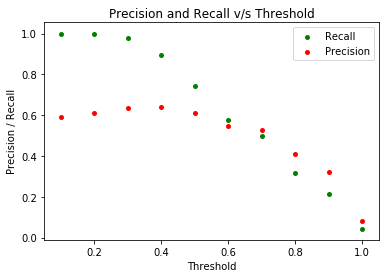

In [101]:
import re
import nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib

def tokenize(doc, lemmatized=False, no_stopword=False):
    
    tokens =[]
    doc=doc.lower()
    split_doc=doc.split(" ")
    false_true=[]
    true_true=[]
    if no_stopword==True and lemmatized==False:
        tokens_nostop = [w for w in split_doc if w not in stop_words]
        tokens=tokens_nostop
    elif no_stopword==False and lemmatized==True:
        for i in split_doc:
            false_true.append(lemmatizer.lemmatize(i))
        tokens=false_true    
    elif no_stopword==True and lemmatized==True:
        tokens_nostop = [w for w in split_doc if not w in stop_words]
        for i in tokens_nostop:
            true_true.append(lemmatizer.lemmatize(i))
        tokens=true_true    
    else:
        tokens=split_doc 
    return tokens


def get_similarity(q1, q2, lemmatized=False, no_stopword=False):
    
    sim = []
    q1_tokenized=[]
    q2_tokenized=[]
    for i in range(len(q1)):
        q1_tokenized.append(tokenize(q1[i],lemmatized, no_stopword))
        q2_tokenized.append(tokenize(q2[i],lemmatized, no_stopword))
    q_concat=q1_tokenized+q2_tokenized
    q_concat = [" ".join(x) for x in q_concat]
    
    vectorizer = TfidfVectorizer(stop_words='english', lowercase=False)
    matrix = vectorizer.fit_transform(q_concat)  
    tfidf_matrix=matrix.toarray()
    #print("Shape : ",tfidf_matrix.shape)
    for i in range(len(q1)):                                            #Finding Cosine Similarity
        dot_product = np.dot(tfidf_matrix[i], tfidf_matrix[i+500])
        norm_a = np.linalg.norm(tfidf_matrix[i])
        norm_b = np.linalg.norm(tfidf_matrix[i+500])
        sim.append(dot_product / (norm_a * norm_b))
    return sim, tfidf_matrix


def predict(sim, ground_truth, threshold=0.4):
    
    predict = []
    recall = None
    k=0
    t=0
    for i in range(len(ground_truth)):
        if sim[i]>threshold:
            predict.append(1)
        else:
            predict.append(0) 
            
    for i in range(len(ground_truth)):
        if (ground_truth[i]==1 and predict[i]==1):
            k=k+1
    for i in range(len(ground_truth)):
        if ground_truth[i]==1:
            t=t+1
    recall=(k/t)
    return predict, recall


def evaluate(sim, ground_truth,threshold):
    
    precision = None
    recall = None
    prediction=[]
    k=0
    t=0
    for i in range(len(ground_truth)):
        if sim[i]>threshold:
            prediction.append(1)
        else:
            prediction.append(0)
            
    for i in range(len(ground_truth)):
        if (ground_truth[i]==1 and prediction[i]==1):
            k=k+1
    for i in range(len(ground_truth)):
        if ground_truth[i]==1:
            t=t+1
    recall=(k/t)
    
    for i in range(len(ground_truth)):
        if (ground_truth[i]==1 and prediction[i]==1):
            k=k+1
    for i in range(len(ground_truth)):
        if prediction[i]==1:
            t=t+1
    precision=(k/t)
    
    return precision, recall


if __name__ == "__main__":

    data=pd.read_csv("C:/Users/HP/Downloads/quora_duplicate_question_500.csv",header=0)
    q1 = data["q1"].values.tolist()
    q2 = data["q2"].values.tolist()
    ground_truth=data["is_duplicate"].values.tolist()
    
    # Test 1
    print("Test 1\n")
    print("lemmatized: No, no_stopword: No")
    sim,tfidf_matrix = get_similarity(q1,q2)
    pred, recall=predict(sim, data["is_duplicate"].values,0.4)
    print(recall)

    print("\nlemmatized: Yes, no_stopword: No")
    sim,tfidf_matrix = get_similarity(q1,q2, True)
    pred, recall=predict(sim, data["is_duplicate"].values,0.4)
    print(recall)

    print("\nlemmatized: No, no_stopword: Yes")
    sim,tfidf_matrix = get_similarity(q1,q2, False, True)
    pred, recall=predict(sim, data["is_duplicate"].values,0.4)
    print(recall)

    print("\nlemmatized: Yes, no_stopword: Yes")
    sim,tfidf_matrix = get_similarity(q1,q2, True, True)
    pred, recall=predict(sim, data["is_duplicate"].values,0.4)
    print(recall)

    # Test 2. Get similarity score, set threshold
    print("\nTest 2\n")
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        print("Threshold :",i)
        prec, rec = evaluate(sim, data["is_duplicate"].values, i)
        print("Precision :",prec,"\nRecall :", rec,"\n")
        matplotlib.pyplot.scatter(i, rec, color='green', marker='.', linewidth=2)
        matplotlib.pyplot.scatter(i, prec, color='red',marker='.', linewidth=2)
        matplotlib.pyplot.title("Precision and Recall v/s Threshold")
        matplotlib.pyplot.legend(('Recall','Precision'))
        matplotlib.pyplot.xlabel("Threshold")
        matplotlib.pyplot.ylabel("Precision / Recall")        